# Model Development
---

## 0.Constants 

In [1]:
FE_DATA_PATH = "../data/processed/fe_data.pkl"

---
## 1. Imports

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [5]:
with open(FE_DATA_PATH, "rb") as file:
    fe_df = pd.read_pickle(file)

fe_df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas_f,has_gas_t,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


---
## 2. Baseline Model

In [6]:
X = fe_df.drop("churn", axis = 1)
y = fe_df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [10]:
rfc = RandomForestClassifier(random_state=11)

#fit the model
rfc.fit(X_train, y_train)

In [31]:
#get prediction labels
preds = rfc.predict(X_test)

In [16]:
feature_importance_df = pd.Series(rfc.feature_importances_, index=X_train.columns, name="Feature Importance")
feature_importance_df

cons_12m                                      0.065976
cons_gas_12m                                  0.014184
cons_last_month                               0.045381
forecast_cons_12m                             0.058738
forecast_cons_year                            0.037578
                                                ...   
origin_up_ewxeelcelemmiwuafmddpobolfuxioce    0.000003
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0.005067
origin_up_ldkssxwpmemidmecebumciepifcamkci    0.005181
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0.007244
origin_up_usapbepcfoloekilkwsdiboslwaxobdp    0.000012
Name: Feature Importance, Length: 62, dtype: float64

<AxesSubplot:>

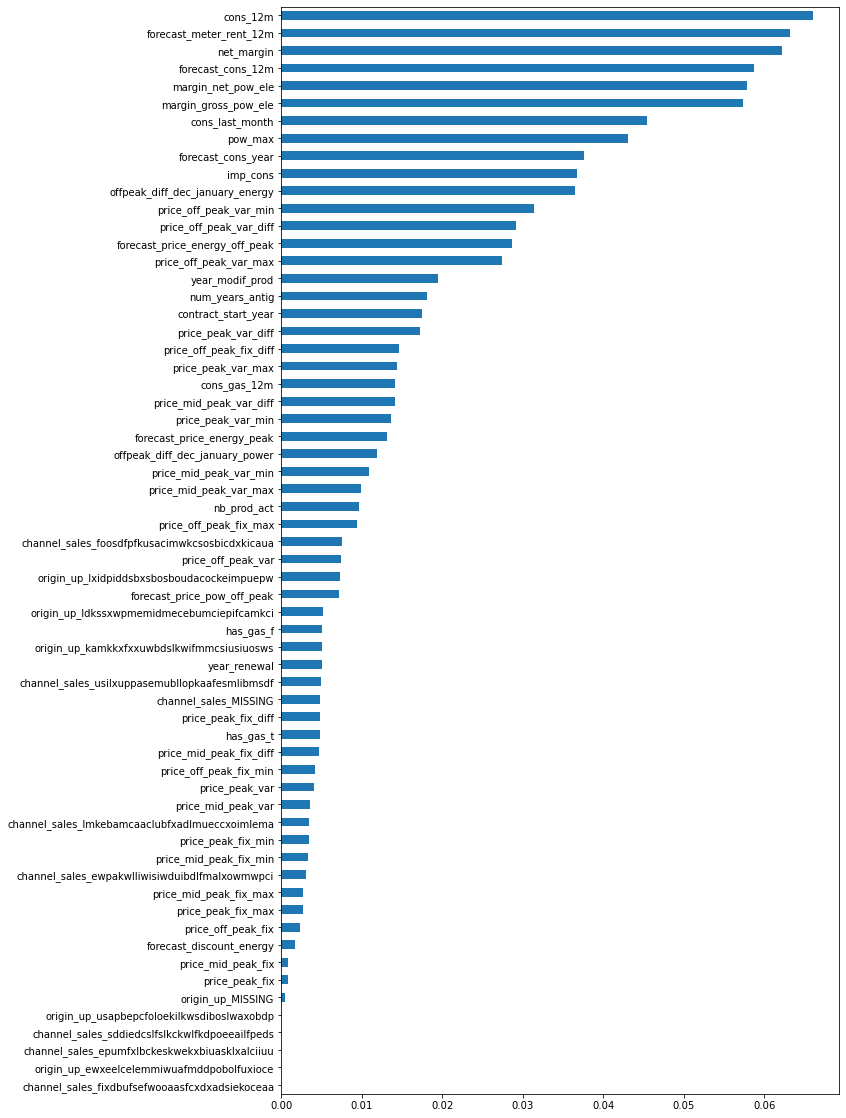

In [30]:
plt.figure(figsize=(10,20))
feature_importance_df.sort_values().plot.barh(y=feature_importance_df.index)

> **Takeaway: We can see from above that features significantly vary in their importance for target prediction.**

In [33]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31541
           1       1.00      1.00      1.00      3489

    accuracy                           1.00     35030
   macro avg       1.00      1.00      1.00     35030
weighted avg       1.00      1.00      1.00     35030



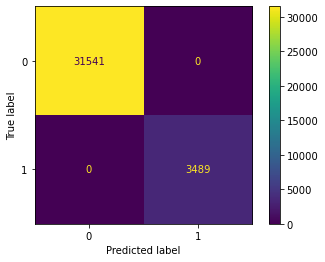

In [35]:
cm = confusion_matrix(y_test, preds, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

> **We can see that the model is overfitting the training data. Therefore, hyperparameter tuning & reducing overfitting are required**

---
## 3. Hyperparameter Tuning

In [50]:
rfc_ht = RandomForestClassifier(n_estimators=1000,
                                max_depth=3,
                                random_state=11)
#fit the model
rfc_ht.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=1000, random_state=11)

In [51]:
#get prediction labels
preds = rfc.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31541
           1       1.00      1.00      1.00      3489

    accuracy                           1.00     35030
   macro avg       1.00      1.00      1.00     35030
weighted avg       1.00      1.00      1.00     35030

